In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

from skimage import io
from skimage.feature import graycomatrix, graycoprops
from skimage.transform import resize

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

import os
from os import path
import math

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('Kmeans_2000.csv')

# Extract the file names from a specific column (assuming column name is 'file_name')
id_files = df['Eye ID'].tolist()
id_files = id_files[:10]
labels = df['Final Label'].tolist()
labels = labels[:10]

In [8]:
from skimage.io import imread, imsave
from skimage.transform import resize

# Resize each image in id_files to 1000x1000x3
# resized_images = [resize(imread(id), (512, 512), order=3, mode='reflect', anti_aliasing=True) for id in id_files]
im = resize(imread(id_files[0]), (512, 512), order=3, mode='reflect', anti_aliasing=True)


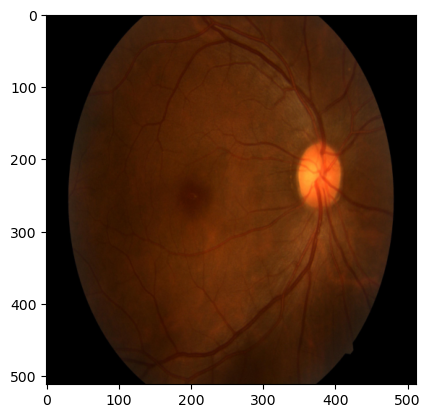

In [9]:
plt.imshow(im)

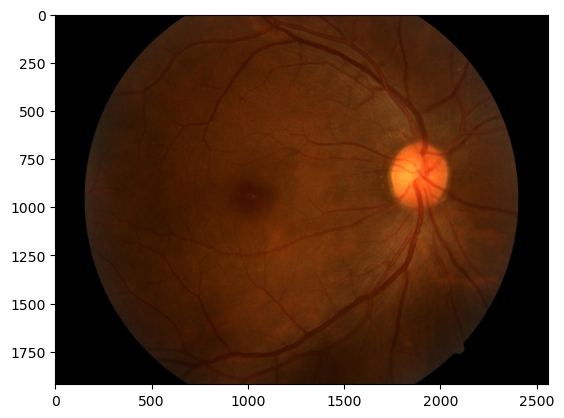

In [10]:
plt.imshow(imread(id_files[0]))

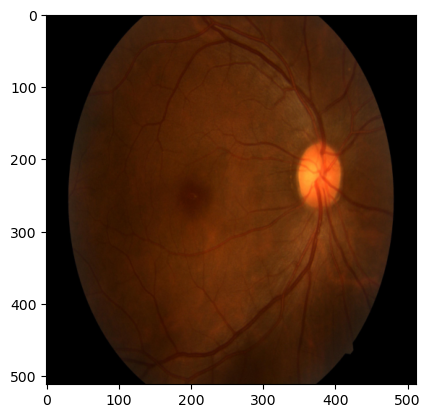

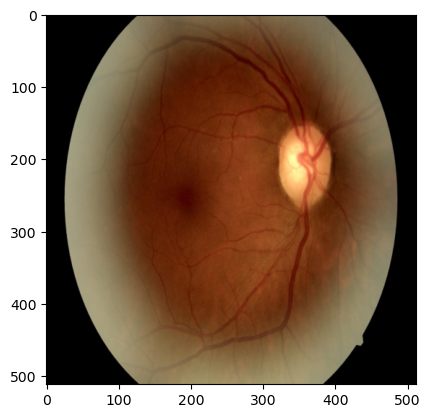

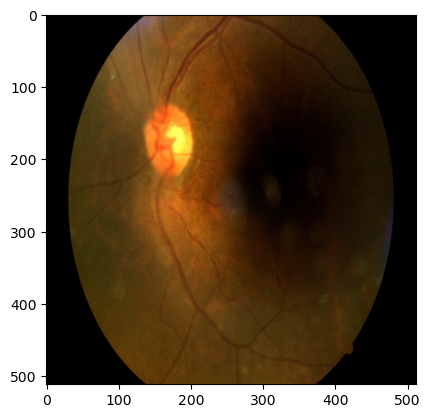

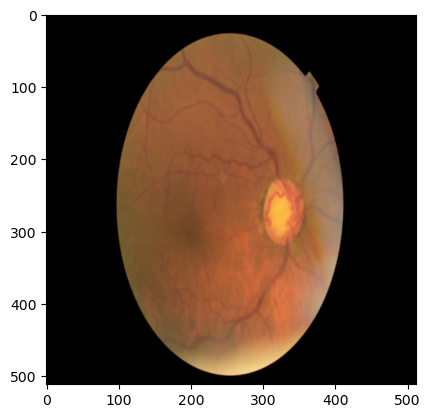

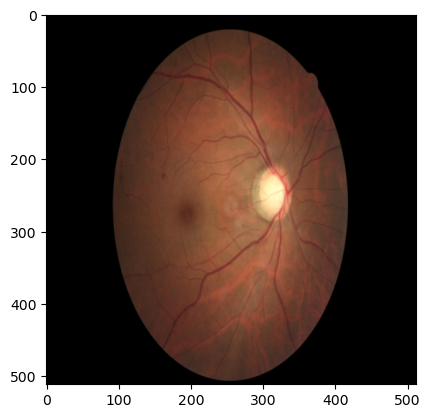

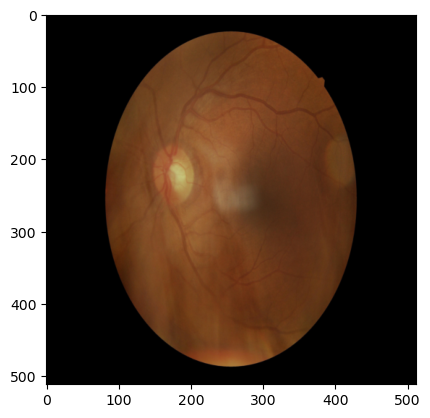

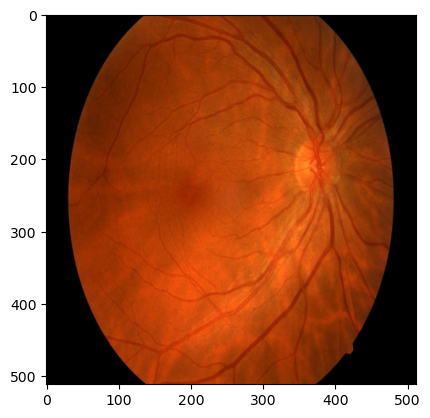

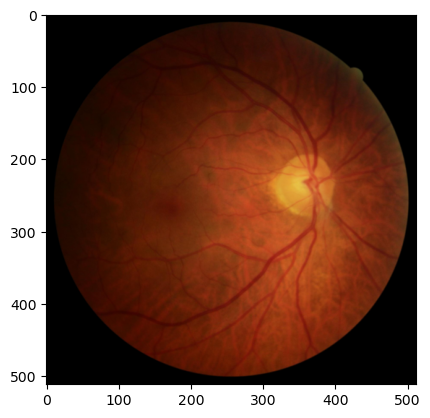

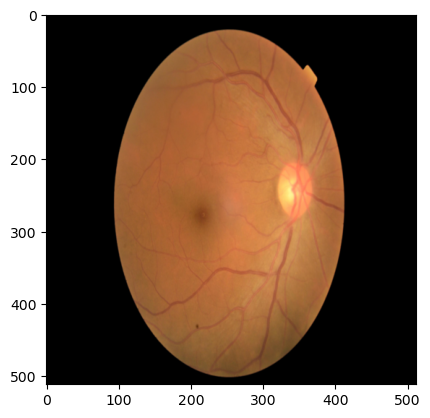

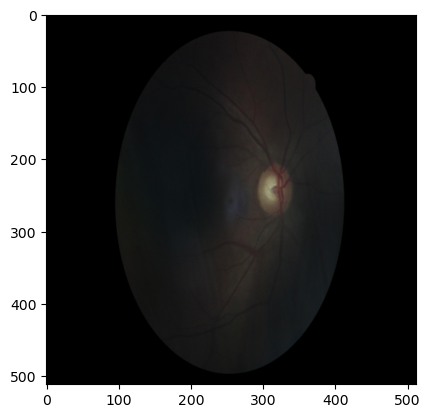

In [4]:
# Save or display the resized images
for idx, resized_image in enumerate(resized_images):
    plt.imshow(resized_image)  # Display the resized image
    plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the CNN model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for dense layers
model.add(Flatten())

# Add Dense layers for classification
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


C:\Users\ameli\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 510, 510, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 253, 253, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 124, 124, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 492032)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │     125,960,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,053,953 (480.86 MB)

 Trainable params: 126,053,953 (480.86 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import numpy
print(type((resized_images[0])))
resized_images = numpy.array(resized_images)
print(type((resized_images)))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
im_train = resized_images[:80]
print(((im_train[0].shape)))
l_train = labels[:80]
im_val = resized_images[80:]
l_val = labels[80:]
history = model.fit(im_train, l_train, validation_data=(im_val, l_val), batch_size=32, epochs=10)

(512, 512, 3)


ValueError: Unrecognized data type: x=[[[[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  ...

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]]


 [[[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  ...

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [2.47032823e-323 9.88131292e-324 9.88131292e-324]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]]


 [[[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  ...

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]]


 ...


 [[[1.02411212e-317 8.31661196e-318 2.84163832e-318]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [3.19617044e-314 2.59555173e-314 8.86847727e-315]
   ...
   [0.00000000e+000 2.61310073e-295 0.00000000e+000]
   [6.50291508e-297 0.00000000e+000 2.14876270e-290]
   [0.00000000e+000 8.37285000e-299 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [2.26467827e-313 1.83910392e-313 6.28384753e-314]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [2.02950872e-293 0.00000000e+000 6.70611963e-287]
   [0.00000000e+000 1.85153844e-294 0.00000000e+000]
   [6.50291508e-297 0.00000000e+000 2.14876270e-290]]

  [[3.19617044e-314 2.59555173e-314 8.86847727e-315]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [9.97499695e-311 8.10051310e-311 2.76778211e-311]
   ...
   [0.00000000e+000 8.15528215e-292 0.00000000e+000]
   [2.02950873e-293 0.00000000e+000 6.70611963e-287]
   [0.00000000e+000 2.61310073e-295 0.00000000e+000]]

  ...

  [[1.10866068e-307 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 7.71371105e-302 4.24916465e-310]
   [3.46004291e-304 0.00000000e+000 0.00000000e+000]
   ...
   [6.73594910e-302 4.36941550e-307 2.94831205e-307]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [2.15832060e-305 1.40004020e-310 9.44692805e-311]]

  [[0.00000000e+000 2.47161331e-305 1.36150979e-313]
   [7.85552519e-307 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 7.71371105e-302 4.24916445e-310]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [1.52929947e-304 9.92012367e-310 6.69371456e-310]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[3.55235045e-311 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 2.47161331e-305 1.36150994e-313]
   [1.10866068e-307 0.00000000e+000 0.00000000e+000]
   ...
   [2.15832060e-305 1.40004020e-310 9.44692805e-311]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [6.91565176e-309 4.48598342e-314 3.02696756e-314]]]


 [[[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  ...

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]]


 [[[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  ...

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]

  [[0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   ...
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]
   [0.00000000e+000 0.00000000e+000 0.00000000e+000]]]] (of type <class 'numpy.ndarray'>)

In [ ]:
### Performance evaluation
#########################
score = classifier.evaluate_generator(test_set,811/batch_size)
print(" Total: ", len(test_set.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])
#print("Accuracy = ",score[1])

In [ ]:
classifier.save('/content/drive/My Drive/glaucom/Gmodel.h5')

In [ ]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
import cv2

In [ ]:
target_size = (256,256)
model=load_model('/content/drive/My Drive/glaucom/Gmodel.h5')
print("model loaded")


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/glaucom/test/class1/img_0_888.jpeg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/glaucom/test/class0/img_0_1035.jpeg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
plt.style.use('fivethirtyeight')
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
plot_model_history(model_info)